In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./UsersLastAccessTop2000.csv')

query = """
SELECT TOP 2000 * FROM Users 
ORDER BY LastAccessDate DESC
"""

In [3]:
data.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,EmailHash,AccountId
0,6895399,68,2016-09-28 17:51:49,Paukdcn,2020-09-27 05:32:18,NaN,NaN,NaN,2,27,0,https://www.gravatar.com/avatar/4c4430a50f562a...,NaN,9285335
1,5992704,1,2016-02-28 07:49:44,Agung Sugiarto,2020-09-27 05:32:18,NaN,NaN,NaN,0,0,0,https://graph.facebook.com/1152658004766648/pi...,NaN,7937175
2,298021,96,2010-03-20 14:04:22,m33,2020-09-27 05:32:18,http://www.bitbucket.org/rickardmagnusson,Sweden / Norway,<p>Right now I'm a full time .NET / System dev...,9,1,0,NaN,NaN,113080
3,6905268,28,2016-09-30 14:43:25,minagawah,2020-09-27 05:32:18,NaN,NaN,NaN,5,0,0,https://www.gravatar.com/avatar/217ef599593df4...,NaN,9299236
4,13297593,1,2020-04-13 00:33:44,Yu Yan,2020-09-27 05:32:18,NaN,NaN,NaN,0,0,0,https://lh5.googleusercontent.com/-yKFuYVbTMVc...,NaN,18265820


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2000 non-null   int64  
 1   Reputation       2000 non-null   int64  
 2   CreationDate     2000 non-null   object 
 3   DisplayName      2000 non-null   object 
 4   LastAccessDate   2000 non-null   object 
 5   WebsiteUrl       303 non-null    object 
 6   Location         963 non-null    object 
 7   AboutMe          496 non-null    object 
 8   Views            2000 non-null   int64  
 9   UpVotes          2000 non-null   int64  
 10  DownVotes        2000 non-null   int64  
 11  ProfileImageUrl  1682 non-null   object 
 12  EmailHash        0 non-null      float64
 13  AccountId        2000 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 218.9+ KB


In [5]:
data.describe()

,Id,Reputation,Views,UpVotes,DownVotes,EmailHash,AccountId
count,2.000000e+03,2000.000000,2000.00000,2000.000000,2000.000000,0.0,2.000000e+03
mean,8.195480e+06,2364.597500,269.50850,189.006000,75.277000,NaN,1.082950e+07
std,4.623746e+06,20407.432556,2858.40191,1051.384322,1050.454607,NaN,6.563812e+06
min,4.340000e+02,1.000000,0.00000,0.000000,0.000000,NaN,3.470000e+02
25%,3.919939e+06,1.000000,0.00000,0.000000,0.000000,NaN,4.471934e+06
50%,8.605248e+06,21.000000,5.00000,0.000000,0.000000,NaN,1.139167e+07
75%,1.269571e+07,300.250000,40.00000,31.000000,0.000000,NaN,1.719595e+07
max,1.434813e+07,614784.000000,109418.00000,23491.000000,30957.000000,NaN,1.960400e+07


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Reputation'}>,
        <AxesSubplot:title={'center':'Views'}>],
       [<AxesSubplot:title={'center':'UpVotes'}>,
        <AxesSubplot:title={'center':'DownVotes'}>,
        <AxesSubplot:title={'center':'EmailHash'}>],
       [<AxesSubplot:title={'center':'AccountId'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

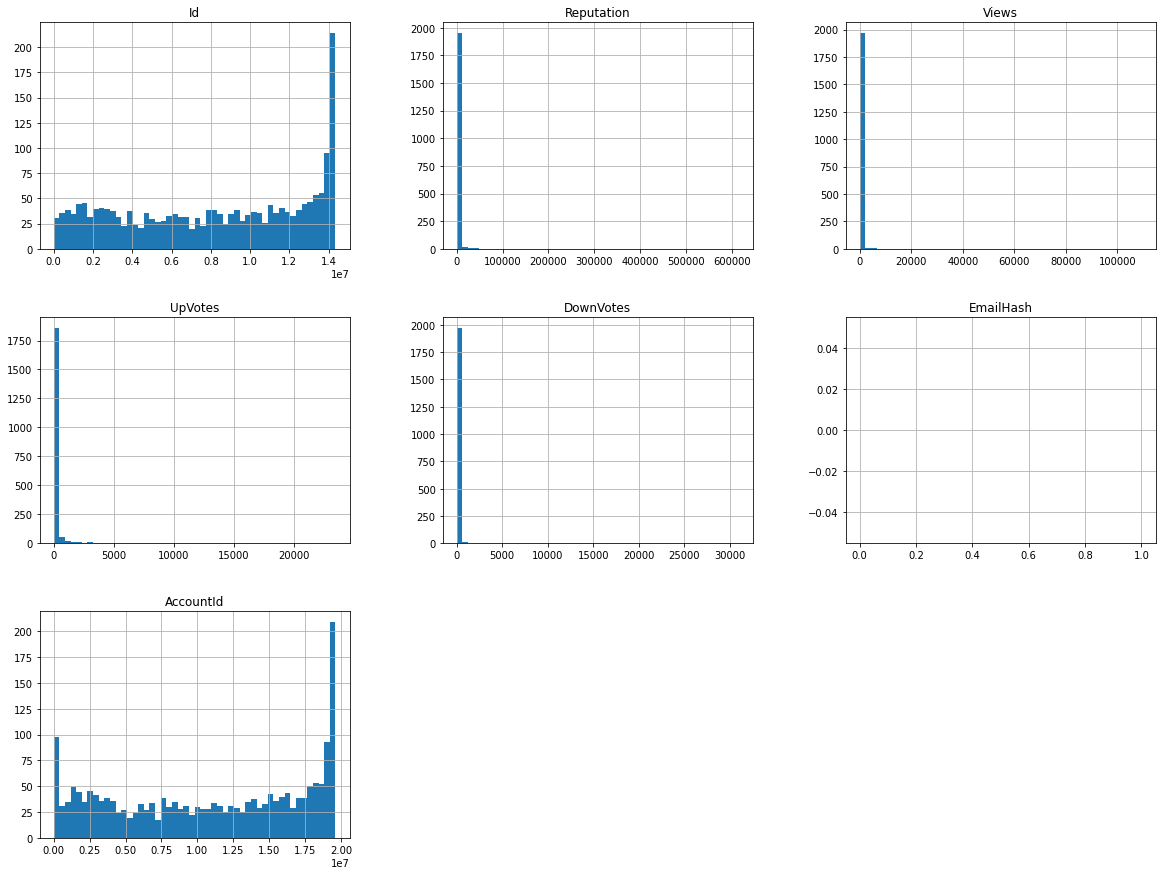

In [6]:
data.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='Reputation', ylabel='Reputation'>,
        <AxesSubplot:xlabel='Views', ylabel='Reputation'>,
        <AxesSubplot:xlabel='UpVotes', ylabel='Reputation'>,
        <AxesSubplot:xlabel='DownVotes', ylabel='Reputation'>],
       [<AxesSubplot:xlabel='Reputation', ylabel='Views'>,
        <AxesSubplot:xlabel='Views', ylabel='Views'>,
        <AxesSubplot:xlabel='UpVotes', ylabel='Views'>,
        <AxesSubplot:xlabel='DownVotes', ylabel='Views'>],
       [<AxesSubplot:xlabel='Reputation', ylabel='UpVotes'>,
        <AxesSubplot:xlabel='Views', ylabel='UpVotes'>,
        <AxesSubplot:xlabel='UpVotes', ylabel='UpVotes'>,
        <AxesSubplot:xlabel='DownVotes', ylabel='UpVotes'>],
       [<AxesSubplot:xlabel='Reputation', ylabel='DownVotes'>,
        <AxesSubplot:xlabel='Views', ylabel='DownVotes'>,
        <AxesSubplot:xlabel='UpVotes', ylabel='DownVotes'>,
        <AxesSubplot:xlabel='DownVotes', ylabel='DownVotes'>]],
      dtype=object)

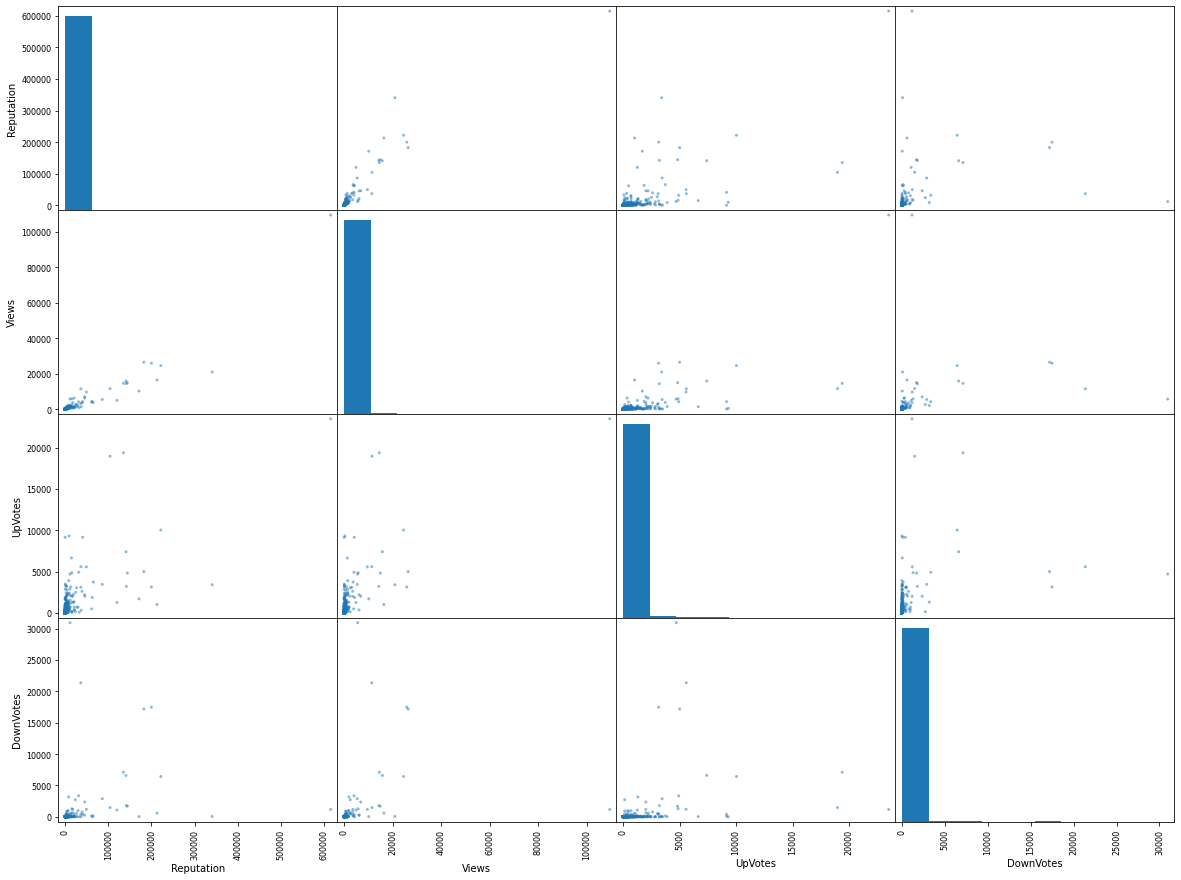

In [9]:
from pandas.plotting import scatter_matrix

attributes =["Reputation","Views","UpVotes","DownVotes"]
scatter_matrix(data[attributes],figsize=(20,15))

In [12]:
correlation = data.corr()
correlation

,Id,Reputation,Views,UpVotes,DownVotes,EmailHash,AccountId
Id,1.000000,-0.157560,-0.124671,-0.213009,-0.098883,NaN,0.980853
Reputation,-0.157560,1.000000,0.932098,0.686024,0.310017,NaN,-0.152337
Views,-0.124671,0.932098,1.000000,0.703199,0.328473,NaN,-0.120849
UpVotes,-0.213009,0.686024,0.703199,1.000000,0.350702,NaN,-0.213140
DownVotes,-0.098883,0.310017,0.328473,0.350702,1.000000,NaN,-0.096359
EmailHash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,0.980853,-0.152337,-0.120849,-0.213140,-0.096359,NaN,1.000000


In [14]:
correlation['Reputation'].sort_values()

Id           -0.157560
AccountId    -0.152337
DownVotes     0.310017
UpVotes       0.686024
Views         0.932098
Reputation    1.000000
EmailHash          NaN
Name: Reputation, dtype: float64